## Import Libraries

In [1]:
import librosa
import librosa.display
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline
plt.style.use('ggplot')


import pandas as pd
import os
import IPython.display as ipd 
import pickle
import numpy
import csv
import scipy.misc
import scipy
from scipy import ndimage
import cv2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


#Neural Networks
# Neural Network Imports
from keras.models import Sequential
from keras.utils import np_utils, to_categorical
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D, Conv1D
from keras.layers.convolutional import MaxPooling2D, MaxPooling1D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from clean_audio_data import *
from feature_extraction import *
from predict_audio import *
from live_audio import *

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




## Loading in Audio DataFrame + Cleaning

In [2]:
df = create_one_df()

## Audio EDA

In [4]:
emotion_count = pd.DataFrame(df.groupby('emotion').count()['gender']).reset_index()

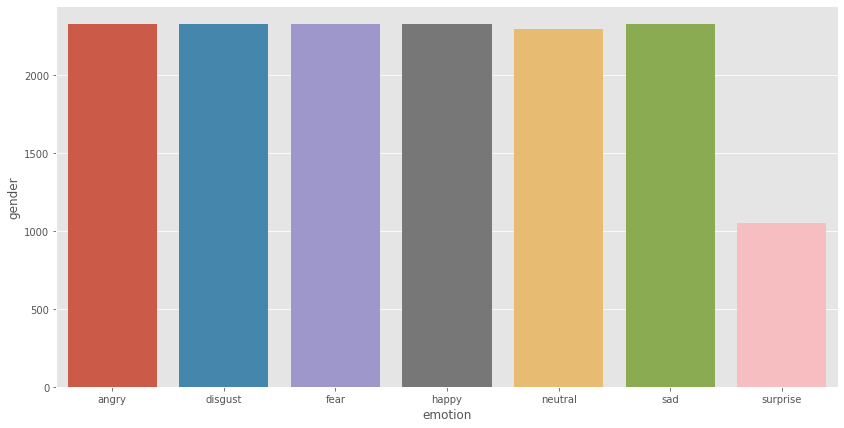

In [5]:
fig, ax = plt.subplots(figsize = (14,7))

sns.barplot(x = emotion_count.emotion, y = emotion_count.gender)

In [6]:
gender_count = pd.DataFrame(df.groupby('gender').count()['emotion']).reset_index()

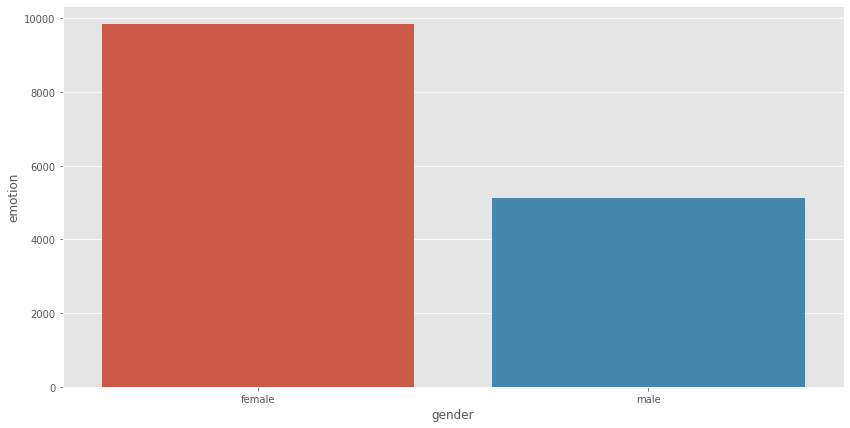

In [7]:
fig, ax = plt.subplots(figsize = (14,7))

sns.barplot(x = gender_count.gender, y = gender_count.emotion)

In [8]:
data_source_count = pd.DataFrame(df.groupby('source').count()['gender']).reset_index()

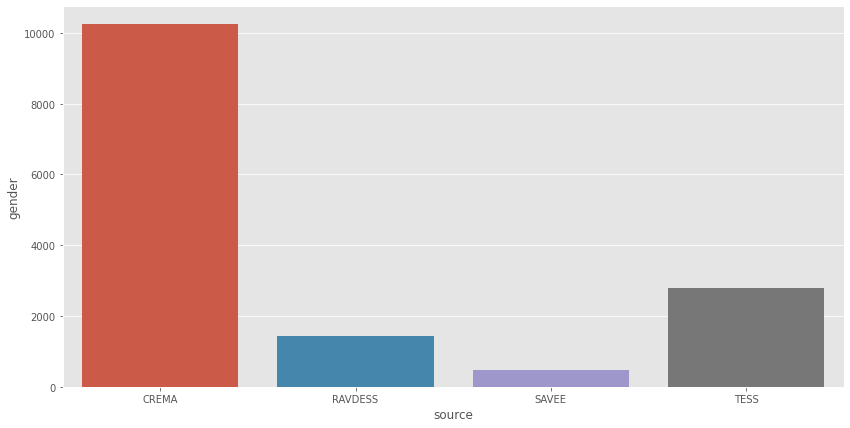

In [9]:
fig, ax = plt.subplots(figsize = (14,7))

sns.barplot(x = data_source_count.source, y = data_source_count.gender)

In [10]:
df[df['gender'] == 'male']

,gender,emotion,source,path,true_label
0,male,angry,SAVEE,../data/SAVEE/DC_a03.wav,male_angry
1,male,neutral,SAVEE,../data/SAVEE/KL_n21.wav,male_neutral
2,male,surprise,SAVEE,../data/SAVEE/KL_su12.wav,male_surprise
3,male,angry,SAVEE,../data/SAVEE/JK_a11.wav,male_angry
4,male,neutral,SAVEE,../data/SAVEE/JE_n07.wav,male_neutral
...,...,...,...,...,...
14903,male,disgust,CREMA,../data/AudioWAV/1090_WSI_DIS_XX.wav,male_disgust
14904,male,fear,CREMA,../data/AudioWAV/1090_WSI_FEA_XX.wav,male_fear
14905,male,happy,CREMA,../data/AudioWAV/1090_WSI_HAP_XX.wav,male_happy
14906,male,neutral,CREMA,../data/AudioWAV/1090_WSI_NEU_XX.wav,male_neutral


In [11]:
female_audio = df[df['gender'] == 'female']
male_audio = df[df['gender'] == 'male']

In [12]:
male_audio[male_audio['source'] == 'RAVDESS'].path.values[0]

'../data/RAV/audio_speech_actors_01-24/Actor_01/03-01-04-02-01-01-01.wav'

In [13]:
male_dict = {
'neutral' : '../data/RAV/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav',
'happy' : '../data/RAV/audio_speech_actors_01-24/Actor_01/03-01-03-02-01-02-01.wav',
'sad' : '../data/RAV/audio_speech_actors_01-24/Actor_01/03-01-04-02-01-02-01.wav',
'angry' : '../data/RAV/audio_speech_actors_01-24/Actor_01/03-01-05-02-01-02-01.wav',
'fearful' : '../data/RAV/audio_speech_actors_01-24/Actor_01/03-01-06-02-01-02-01.wav',
'disgust' : '../data/RAV/audio_speech_actors_01-24/Actor_01/03-01-07-02-01-02-01.wav',
'surprised' : '../data/RAV/audio_speech_actors_01-24/Actor_01/03-01-08-02-01-02-01.wav',
}

female_dict = {
'neutral' : '../data/RAV/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-02-02.wav',
'happy' : '../data/RAV/audio_speech_actors_01-24/Actor_02/03-01-03-02-01-02-02.wav',
'sad' : '../data/RAV/audio_speech_actors_01-24/Actor_02/03-01-04-02-01-02-02.wav',
'angry' : '../data/RAV/audio_speech_actors_01-24/Actor_02/03-01-05-02-01-02-02.wav',
'fearful' : '../data/RAV/audio_speech_actors_01-24/Actor_02/03-01-06-02-01-02-02.wav',
'disgust' : '../data/RAV/audio_speech_actors_01-24/Actor_02/03-01-07-02-01-02-02.wav',
'surprised' : '../data/RAV/audio_speech_actors_01-24/Actor_02/03-01-08-02-01-02-02.wav',
}

In [14]:
audio_path = male_dict['neutral']
neutral , sr = librosa.load(audio_path)
ipd.Audio(audio_path)

In [15]:
audio_path = female_dict['neutral']
neutral , sr = librosa.load(audio_path)
ipd.Audio(audio_path)

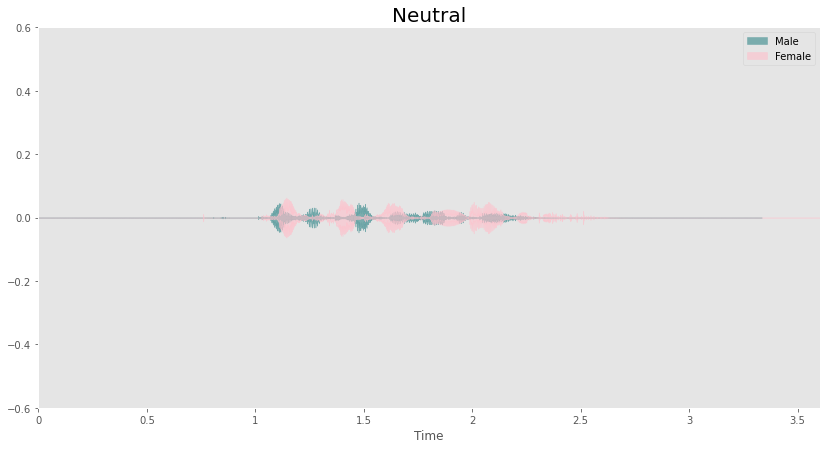

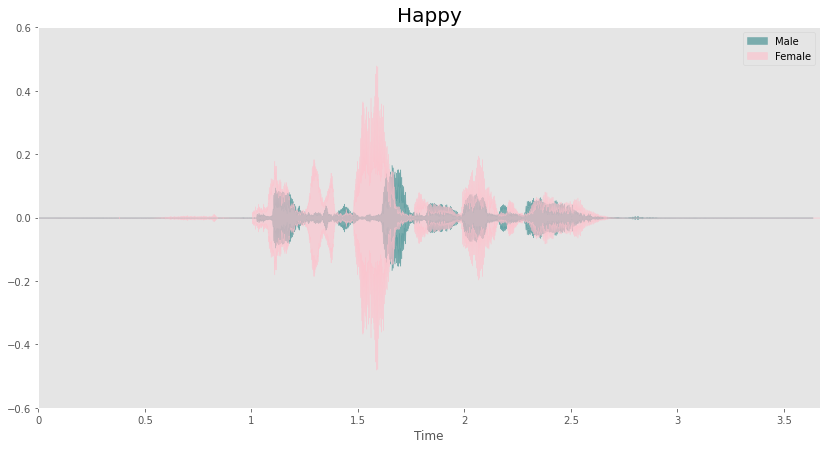

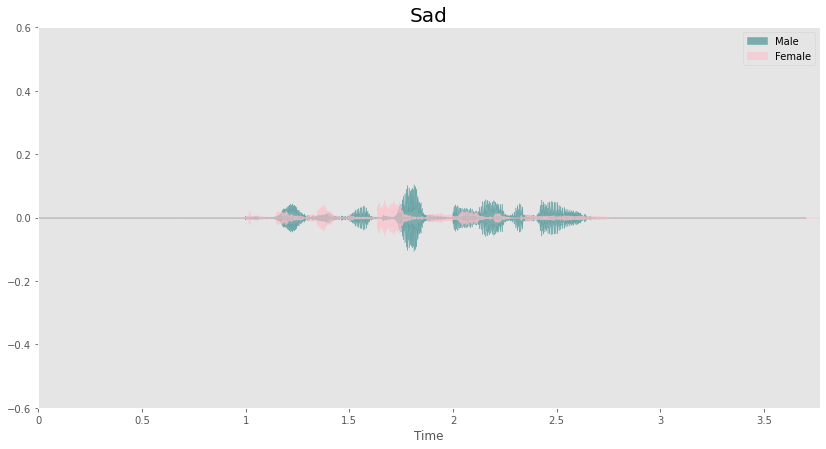

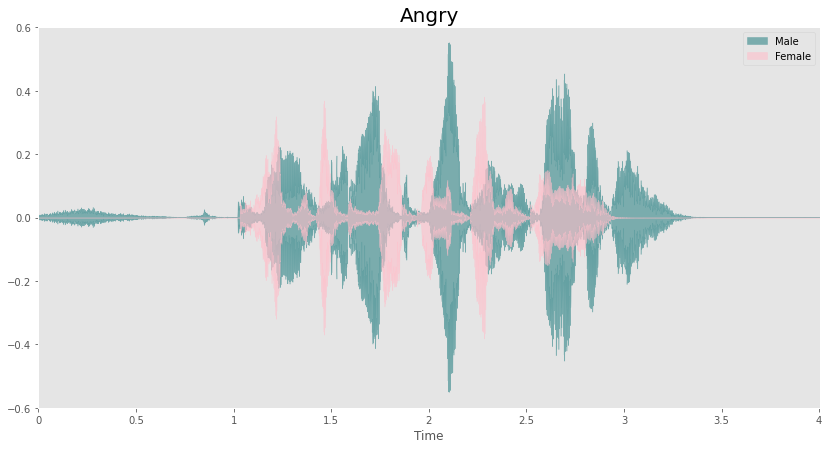

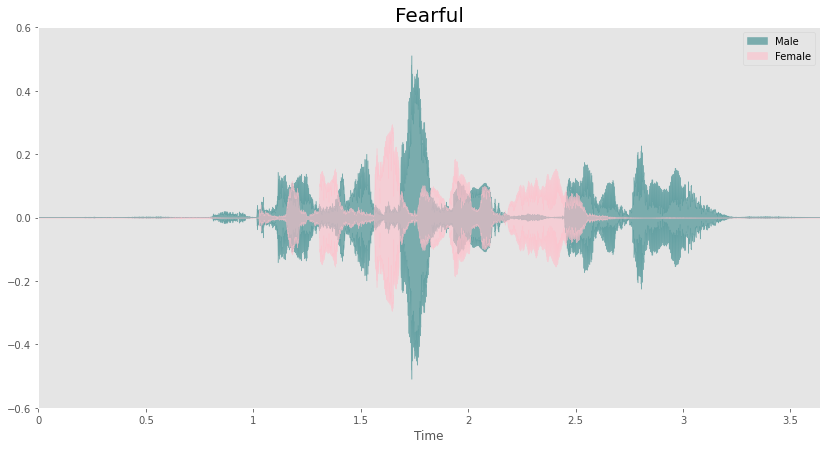

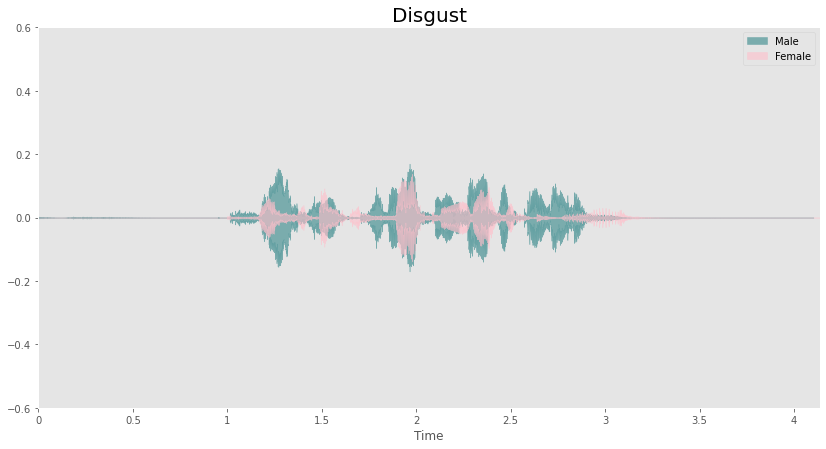

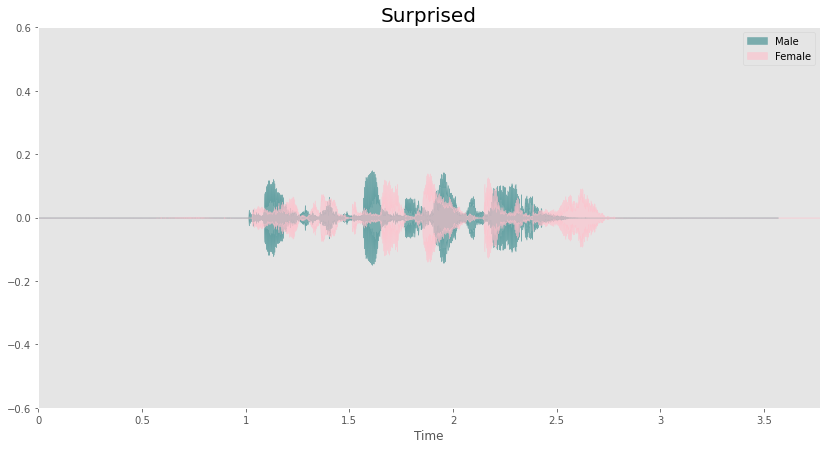

In [16]:
for emotion in list(male_dict.keys()):
    fig, ax = plt.subplots(figsize = (14,7))
    y, sr = librosa.load(male_dict[emotion])
    y1, sr1 = librosa.load(female_dict[emotion])
    ax = librosa.display.waveplot(y, alpha=0.8, label='Male', color='cadetblue')
    ax = librosa.display.waveplot(y1, alpha=0.6, label='Female', color='pink')
    plt.grid(visible = False)
    plt.legend()
    plt.title(emotion.title(), fontsize = 20)
    plt.ylim(bottom=-.6, top=.6)

In [15]:
mfcc_df = mfcc(df.path)

KeyboardInterrupt: 

In [30]:
from python_speech_features import mfcc, logfbank

In [1]:
# df1.to_csv("mfcc_audio_df.csv",index=False)

In [3]:
df1 = pd.read_csv('../../data/mfcc_audio_df.csv')

In [4]:
df3 = df1.drop(['gender','emotion','source','path', 'true_label'], axis = 1)
y = df1.true_label

In [5]:
scaler = StandardScaler()
X = scaler.fit(np.array(df3.iloc[:, :-1], dtype = float))
X = scaler.transform(np.array(df3.iloc[:, :-1], dtype = float))
X = X.reshape(X.shape[0], X.shape[1],1)

In [6]:
with open("../../data/scaler.pickle", "wb") as output_file:
    pickle.dump(scaler, output_file)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [8]:
y_train = np.array(y_train)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [9]:
with open("../../data/encoder.pickle", "wb") as output_file:
    pickle.dump(lb, output_file)

In [26]:
def my_model():
    model = Sequential()
    model.add(Conv1D(64, 3, input_shape=(49, 1),activation='relu', padding='same'))
#     model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(128, 5, activation='relu',padding='same'))
#     model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(256, 3,activation='relu',padding='same'))
#     model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(14))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=Adam(lr=0.001))
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()

In [27]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [28]:
earlystop = EarlyStopping(monitor='val_loss',
                          patience=20,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=20,
                              verbose=1,
                              min_delta=0.0001)

In [29]:
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=100, 
            verbose=1, 
            validation_data=(X_test,y_test),
            callbacks=[earlystop, reduce_lr],
            shuffle=True
            )

Train on 11969 samples, validate on 2993 samples
Epoch 1/100
11969/11969 [==============================] - 6s 475us/step - loss: 1.3129 - acc: 0.5418 - val_loss: 1.0775 - val_acc: 0.5971
Epoch 2/100
11969/11969 [==============================] - 2s 187us/step - loss: 1.0197 - acc: 0.6275 - val_loss: 0.9850 - val_acc: 0.6345
Epoch 3/100
11969/11969 [==============================] - 2s 186us/step - loss: 0.8913 - acc: 0.6701 - val_loss: 0.9499 - val_acc: 0.6438
Epoch 4/100
11969/11969 [==============================] - 2s 187us/step - loss: 0.7545 - acc: 0.7191 - val_loss: 1.1492 - val_acc: 0.6311
Epoch 5/100
11969/11969 [==============================] - 2s 184us/step - loss: 0.8159 - acc: 0.7003 - val_loss: 0.9603 - val_acc: 0.6575
Epoch 6/100
11969/11969 [==============================] - 2s 185us/step - loss: 0.6328 - acc: 0.7627 - val_loss: 0.9711 - val_acc: 0.6726
Epoch 7/100
11969/11969 [==============================] - 2s 184us/step - loss: 0.5010 - acc: 0.8117 - val_loss: 1.0

In [28]:
X_train.shape

(11969, 49, 1)

In [30]:
scores = model.evaluate(X_test, y_test)
print('%s: %.2f%%'% (model.metrics_names[1], scores[1]*100))

2993/2993 [==============================] - 0s 103us/step
acc: 64.38%


In [31]:
model.save('audio_nn.h5')
model.save_weights('audio_nn_weights.h5')

In [32]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.7457598796891971
Testing Accuracy:  0.6438356165578443


In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 49, 64)            256       
_________________________________________________________________
batch_normalization_4 (Batch (None, 49, 64)            256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 24, 128)           41088     
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 128)           512       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 12, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 12, 256)           98560     
__________

In [33]:
preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

2993/2993 [==============================] - 1s 293us/step


array([ 6,  3,  0, ..., 11,  7,  7])

In [34]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

,actualvalues,predictedvalues
170,male_neutral,male_neutral
171,male_angry,male_happy
172,female_neutral,female_neutral
173,male_sad,male_disgust
174,female_fear,female_fear
175,female_fear,male_fear
176,female_sad,female_sad
177,male_fear,male_fear
178,female_fear,female_fear
179,male_angry,male_angry


In [65]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (14,10), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label', fontsize = 25)
    plt.xlabel('Predicted label', fontsize = 25)
# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.6438356164383562


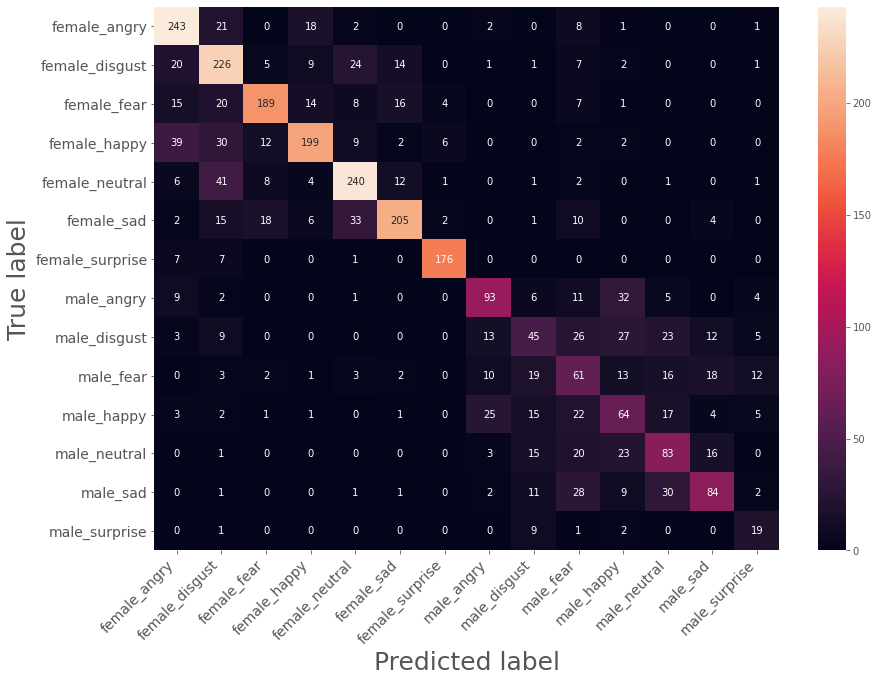

In [66]:
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [58]:
def create_plot(model_history):
        '''Check the logloss of both train and validation, make sure they are close and have plateau'''
        plt.figure(figsize = (14, 7))
        plt.plot(model_history.history['loss'])
        plt.plot(model_history.history['val_loss'])
        plt.title('Model Loss', fontsize = 20)
        plt.ylabel('Loss', fontsize = 15)
        plt.xlabel('Epoch', fontsize = 15)
        plt.legend(['Training Loss', 'Testing Loss'], loc='upper left', fontsize = 13)
        plt.show()



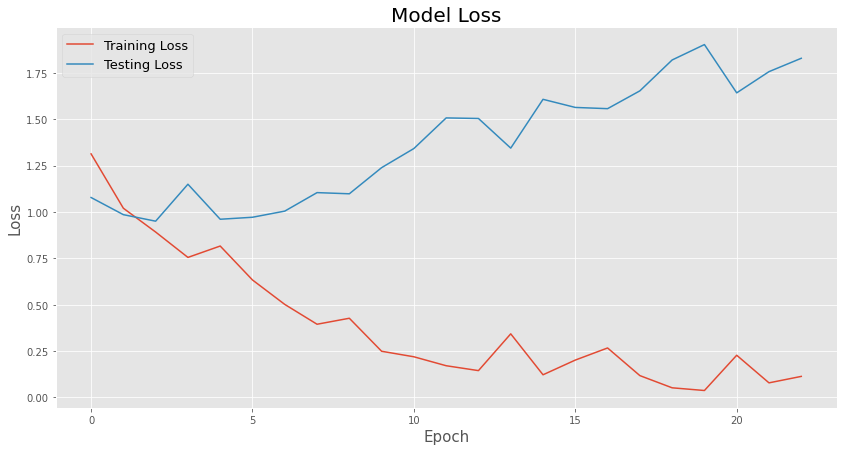

In [59]:
create_plot(h)

In [60]:
def create_plot(model_history):
        '''Check the logloss of both train and validation, make sure they are close and have plateau'''
        plt.figure(figsize = (14, 7))
        plt.plot(model_history.history['acc'])
        plt.plot(model_history.history['val_acc'])
        plt.title('Model Accuracy', fontsize = 20)
        plt.ylabel('Loss', fontsize = 15)
        plt.xlabel('Epoch', fontsize = 15)
        plt.legend(['Training Accu', 'Testing Acc'], loc='upper left', fontsize = 13)
        plt.show()



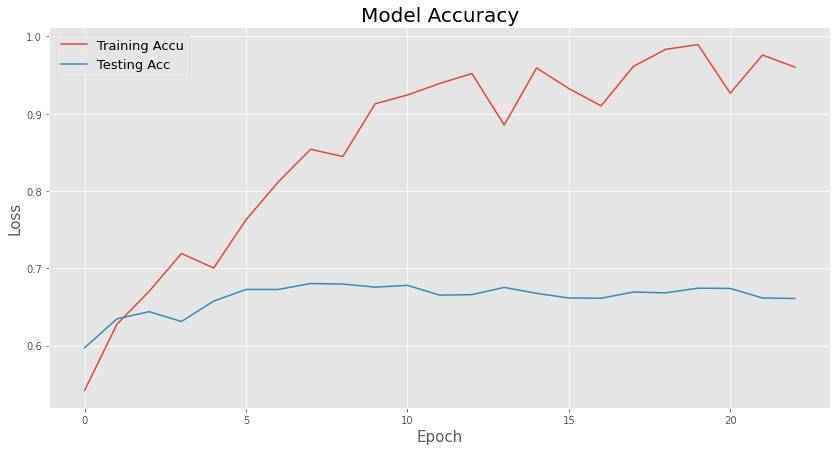

In [61]:
create_plot(h)

In [40]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.70      0.82      0.76       296
 female_disgust       0.60      0.73      0.66       310
    female_fear       0.80      0.69      0.74       274
   female_happy       0.79      0.66      0.72       301
 female_neutral       0.75      0.76      0.75       317
     female_sad       0.81      0.69      0.75       296
female_surprise       0.93      0.92      0.93       191
     male_angry       0.62      0.57      0.60       163
   male_disgust       0.37      0.28      0.31       163
      male_fear       0.30      0.38      0.33       160
     male_happy       0.36      0.40      0.38       160
   male_neutral       0.47      0.52      0.49       161
       male_sad       0.61      0.50      0.55       169
  male_surprise       0.38      0.59      0.46        32

       accuracy                           0.64      2993
      macro avg       0.61      0.61      0.60      2993
   weighted avg       0.66   

In [6]:
df = create_one_df()